## Preprocessing

In [71]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [72]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])

# Display the DataFrame to confirm the changes
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [73]:
# Determine the number of unique values in each column.
# Get the number of unique values in each column
unique_values = application_df.nunique()
print(unique_values)


APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [74]:
# View the value counts for the 'APPLICATION_TYPE' column
application_df['APPLICATION_TYPE'].value_counts()


,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [75]:
# Get the value counts for 'APPLICATION_TYPE'
value_counts = application_df['APPLICATION_TYPE'].value_counts()

# Define a cutoff for rare categories (e.g., categories with less than 50 occurrences)
cutoff = 50
rare_categories = value_counts[value_counts < cutoff].index

# Replace rare categories with 'Other'
application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(rare_categories, 'Other')

# View the updated value counts to confirm the replacement
application_df['APPLICATION_TYPE'].value_counts()


,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [76]:
# Get the value counts for 'APPLICATION_TYPE'
value_counts = application_df['APPLICATION_TYPE'].value_counts()

# Define a cutoff for rare categories (e.g., categories with less than 50 occurrences)
cutoff = 50
rare_categories = value_counts[value_counts < cutoff].index

# Replace rare categories with 'Other'
application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(rare_categories, 'Other')

# View the updated value counts to confirm the replacement
application_df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [97]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
# Get the value counts for 'APPLICATION_TYPE'
value_counts = application_df['APPLICATION_TYPE'].value_counts()

# Define a cutoff for rare categories (e.g., categories with less than 50 occurrences)
cutoff = 50
rare_categories = value_counts[value_counts < cutoff].index

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()


,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [78]:
# View the value counts for the 'CLASSIFICATION' column
application_df['CLASSIFICATION'].value_counts()




,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
...,...
C4120,1
C8210,1
C2561,1


In [79]:
# Get the value counts for 'CLASSIFICATION'
value_counts_classification = application_df['CLASSIFICATION'].value_counts()

# Define a cutoff for rare categories (e.g., categories with less than 50 occurrences)
cutoff = 50
rare_categories_classification = value_counts_classification[value_counts_classification < cutoff].index

# Replace rare categories with 'Other'
application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(rare_categories_classification, 'Other')

# View the updated value counts to confirm the replacement
application_df['CLASSIFICATION'].value_counts()


,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
Other,391
C1700,287
C4000,194


In [80]:
# Get the value counts for 'CLASSIFICATION'
classification_counts = application_df['CLASSIFICATION'].value_counts()

# Filter to get only the values with more than 1 occurrence
classification_counts_more_than_one = classification_counts[classification_counts > 1]

# Display the filtered value counts
classification_counts_more_than_one


,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
Other,391
C1700,287
C4000,194


In [81]:
# Identify the classification categories that have fewer than or equal to 1 occurrence
cutoff = 1  # Categories with 1 or fewer occurrences
rare_categories_classification = classification_counts[classification_counts <= cutoff].index

# Replace rare categories with 'Other'
application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(rare_categories_classification, 'Other')

# View the updated value counts to confirm the replacement
application_df['CLASSIFICATION'].value_counts()


,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
Other,391
C1700,287
C4000,194


In [82]:
# Define a cutoff value (e.g., classifications with fewer than 50 occurrences will be replaced)
cutoff = 50

# Get the value counts for 'CLASSIFICATION'
classification_counts = application_df['CLASSIFICATION'].value_counts()

# Identify classifications that occur fewer than or equal to the cutoff value
classifications_to_replace = classification_counts[classification_counts <= cutoff].index.tolist()

# Display the list of classifications to be replaced
classifications_to_replace


# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

 # Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
Other,441
C1700,287
C4000,194


In [83]:
# Convert categorical data to numeric with `pd.get_dummies`
# Use pd.get_dummies() to convert categorical columns to numeric (one-hot encoding)
application_df_encoded = pd.get_dummies(application_df, drop_first=True)

# Display the first few rows of the encoded DataFrame
application_df_encoded.head()


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,108590,1,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,1,5000,0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,6692,1,False,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
4,1,142590,1,False,False,True,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False


In [98]:
# Split our preprocessed data into our features and target arrays
# Define the target variable 'IS_SUCCESSFUL' and features (X)
X = application_df_encoded.drop(columns=['IS_SUCCESSFUL'])  # All columns except 'IS_SUCCESSFUL'
y = application_df_encoded['IS_SUCCESSFUL']  # 'IS_SUCCESSFUL' is our target variable

# Display the first few rows of the features and target variables
X.head(), y.head()


# Split the preprocessed data into a training and testing dataset
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training data (X_train): {X_train.shape}")
print(f"Testing data (X_test): {X_test.shape}")
print(f"Training labels (y_train): {y_train.shape}")
print(f"Testing labels (y_test): {y_test.shape}")


Training data (X_train): (27439, 45)
Testing data (X_test): (6860, 45)
Training labels (y_train): (27439,)
Testing labels (y_test): (6860,)


In [85]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [86]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [94]:
# Define the number of input features (X_train has the same number of features)
input_dim = X_train.shape[1]  # Number of columns in X_train (features)

# Define the model
model = Sequential()

# Add the input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=input_dim))

# Add additional hidden layers (you can change the number of layers and units)
model.add(Dense(units=32, activation='relu'))  # Second hidden layer
model.add(Dense(units=16, activation='relu'))  # Third hidden layer

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))  # Output layer (binary classification)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary to check the architecture
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,569 (21.75 KB)

 Trainable params: 5,569 (21.75 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
# Compile the model
# Compile the model with the Adam optimizer, binary crossentropy loss, and accuracy metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary to confirm the compilation and architecture
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,569 (21.75 KB)

 Trainable params: 5,569 (21.75 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
# Train the model
# Train the model
history = model.fit(
    X_train_scaled,  # Training features
    y_train,         # Training labels
    epochs=50,       # Number of epochs to train the model
    batch_size=32,   # Number of samples per gradient update
    validation_data=(X_test_scaled, y_test),  # Validation data to evaluate the model during training
    verbose=2        # Display training progress
)


Epoch 1/50
858/858 - 4s - 5ms/step - accuracy: 0.7205 - loss: 0.5698 - val_accuracy: 0.7243 - val_loss: 0.5602
Epoch 2/50
858/858 - 3s - 4ms/step - accuracy: 0.7300 - loss: 0.5519 - val_accuracy: 0.7289 - val_loss: 0.5630
Epoch 3/50
858/858 - 2s - 2ms/step - accuracy: 0.7313 - loss: 0.5491 - val_accuracy: 0.7230 - val_loss: 0.5619
Epoch 4/50
858/858 - 2s - 3ms/step - accuracy: 0.7325 - loss: 0.5476 - val_accuracy: 0.7255 - val_loss: 0.5579
Epoch 5/50
858/858 - 2s - 2ms/step - accuracy: 0.7324 - loss: 0.5464 - val_accuracy: 0.7309 - val_loss: 0.5562
Epoch 6/50
858/858 - 2s - 2ms/step - accuracy: 0.7324 - loss: 0.5457 - val_accuracy: 0.7276 - val_loss: 0.5556
Epoch 7/50
858/858 - 3s - 3ms/step - accuracy: 0.7337 - loss: 0.5448 - val_accuracy: 0.7294 - val_loss: 0.5537
Epoch 8/50
858/858 - 3s - 4ms/step - accuracy: 0.7330 - loss: 0.5441 - val_accuracy: 0.7303 - val_loss: 0.5550
Epoch 9/50
858/858 - 5s - 5ms/step - accuracy: 0.7341 - loss: 0.5434 - val_accuracy: 0.7305 - val_loss: 0.5541
E

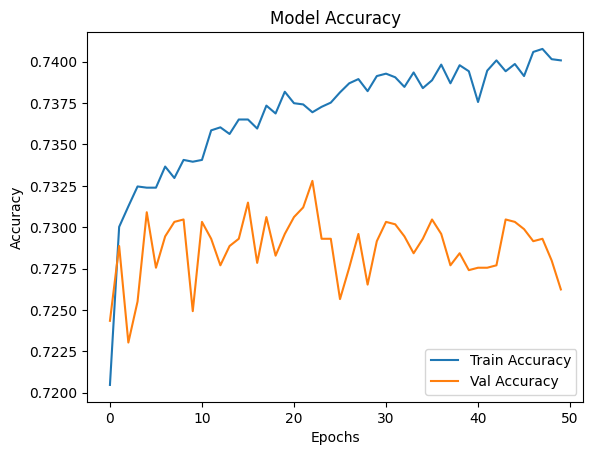

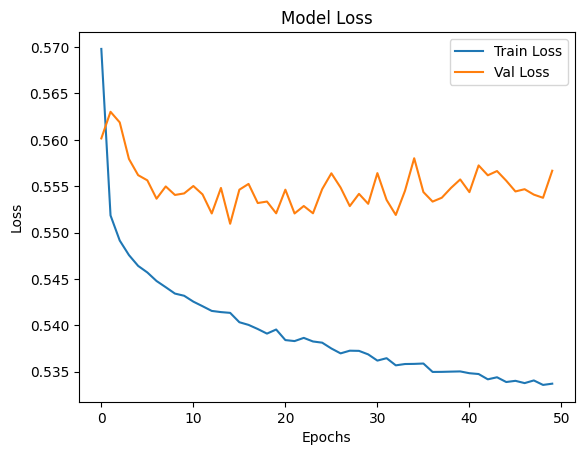

In [91]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [92]:
# Evaluate the model using the test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)

# Display the test loss and accuracy
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


215/215 - 0s - 1ms/step - accuracy: 0.7262 - loss: 0.5567
Test Loss: 0.5566692352294922
Test Accuracy: 0.7262390851974487


In [93]:
# Export our model to HDF5 file
# Save the model to an HDF5 file
model.save('/mnt/data/charity_model.h5')

# Confirm that the model was saved successfully
print("Model saved as charity_model.h5")


Model saved as charity_model.h5
